<a href="https://colab.research.google.com/github/ernestomancebo/DeepLearningInPractice/blob/main/text_and_sequences/Conv1D_movie_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Conv1D for Sequence Feature Extraction

`ConvNet` performs really well on feature extraction for images, but that's a 2D approach. To solve a sequence type problem we would rely on a 1D rank tensor approach, meaning that we must use the Conv1D implementation from Keras.

What we will solve is the here is the IMDB sentiment analysis problem by examining the precense of "good" or "bad" words mapped during the convolution and pooling operations.

In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10_000
max_len = 50

(x_train, y_train), (x_val, y_val) = imdb.load_data(num_words=max_features)

print(f'Train sequences: {len(x_train)}')
print(f'Validation sequences: {len(x_val)}')

x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_val = sequence.pad_sequences(x_val, maxlen=max_len)

print(f'Train shape: {x_train.shape}')
print(f'Validation shape: {x_val.shape}')

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

Train sequences: 25000
Validation sequences: 25000
Train shape: (25000, 50)
Validation shape: (25000, 50)


##Model Building

In [9]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

model.compile(optimizer=RMSprop(lr=1e-4), loss='binary_crossentropy', metrics=['acc'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 50, 128)           1280000   
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 44, 32)            28704     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 8, 32)             0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 2, 32)             7200      
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,315,937
Trainable params: 1,315,937
Non-trainable params: 0
____________________________________________

In [10]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 2s 12ms/step - loss: 0.6928 - acc: 0.5125 - val_loss: 0.6904 - val_acc: 0.5616
Epoch 2/10
157/157 [==============================] - 2s 11ms/step - loss: 0.6860 - acc: 0.6403 - val_loss: 0.6800 - val_acc: 0.6474
Epoch 3/10
157/157 [==============================] - 2s 11ms/step - loss: 0.6664 - acc: 0.7145 - val_loss: 0.6465 - val_acc: 0.6692
Epoch 4/10
157/157 [==============================] - 2s 11ms/step - loss: 0.6162 - acc: 0.7341 - val_loss: 0.5825 - val_acc: 0.7216
Epoch 5/10
157/157 [==============================] - 2s 11ms/step - loss: 0.5357 - acc: 0.7720 - val_loss: 0.5231 - val_acc: 0.7458
Epoch 6/10
157/157 [==============================] - 2s 11ms/step - loss: 0.4577 - acc: 0.8056 - val_loss: 0.4896 - val_acc: 0.7554
Epoch 7/10
157/157 [==============================] - 2s 11ms/step - loss: 0.4159 - acc: 0.8207 - val_loss: 0.4724 - val_acc: 0.7672
Epoch 8/10
157/157 [==============================] - 2s 11ms/step - 

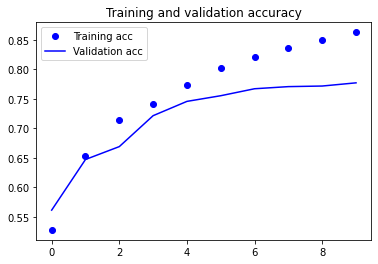

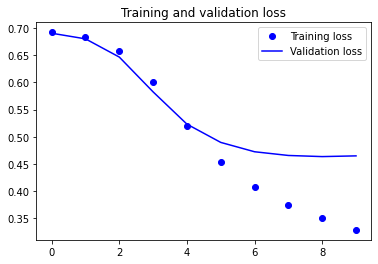

In [11]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

That's all. May not all the sequence be a RNN matter, this example demostrate that mapping/extracting features from a input sequence may expose a good idea of what's being faced such as a good or bad review, taking in count that the order is not 100% determinant.